In [49]:
import math
import matplotlib.pyplot as plt

## Determine flow rate given gravity gradient

# I need to find pressure at end given depth of water in the cylinder
def get_gravity_at_depth(depth, gravity_gradient, end_gravity):
    return end_gravity - gravity_gradient * depth

def get_discharge_velocity(water_height, gravity_gradient, end_gravity): #water height is water remaining in tank
        return math.sqrt(2* (end_gravity * water_height - 0.5 * gravity_gradient * water_height**2))

# volume flow rate
def get_volume_flow_rate(water_height, orifice_diameter, gravity_gradient, end_gravity):
    return get_discharge_velocity(water_height, gravity_gradient, end_gravity) * 3.14159 * (orifice_diameter / 2)**2

# get time to empty - must integrate over time since flow rate is not constant
def get_time_to_empty(water_height, orifice_diameter, gravity_gradient, end_gravity, initial_water_volume, cylinder_diameter):
    lost_volume = 0
    time = 0
    dt = 0.1
    while lost_volume < initial_water_volume:
        current_water_height = (initial_water_volume - lost_volume) / (3.14159 * (cylinder_diameter / 2)**2)
        g_avg = (end_gravity + gravity_gradient * current_water_height) / 2
        discharge_velocity = math.sqrt(2 * g_avg * current_water_height)
        #discharge_velocity = get_discharge_velocity(current_water_height, gravity_gradient, end_gravity)
        discharge_volume = discharge_velocity * 3.14159 * (orifice_diameter / 2)**2
        lost_volume += discharge_volume * dt
        #plt.plot(time, current_water_height , 'ro', label="Simulated Data") #graphs the volume of water remaining
        plt.plot(time, discharge_velocity * 100, 'bo')
        time += dt
    return time

def get_volume(height, diameter):
    return 3.14159 * (diameter / 2)**2 * height
    


21.500000000000036


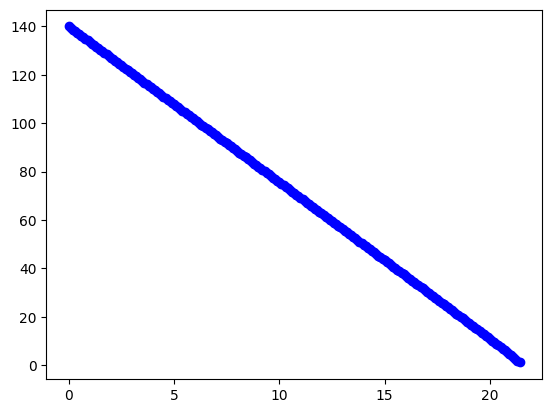

In [50]:
#Initial test: water draining from a cylinder
filled_height = 0.2 #m
orifice_diameter = 0.0065 #6.5mm
tube_inner_diameter = 0.0568 #m
water_volume = get_volume(filled_height, tube_inner_diameter)

estimated_empty_time = get_time_to_empty(filled_height, orifice_diameter, 0, 9.8, water_volume, tube_inner_diameter)
print(estimated_empty_time)
#12 seconds in trial

In [51]:
# Compute real horizontal velocity from measured water trace
arm_length = 0.44 #m - from center of rotation to orifice

horizontal_displacement = 2.74 - arm_length #m
vertical_displacement = 1.32 #m

def compute_horizontal_velocity(gravity, horizontal_displacement, vertical_displacement):
    return math.sqrt(2 * gravity * horizontal_displacement / (1 - (vertical_displacement / horizontal_displacement)**2))

real_horizontal_velocity = compute_horizontal_velocity(9.8, horizontal_displacement, vertical_displacement)
print(real_horizontal_velocity)

#Computer theoretical horizontal velocity at exit
number_of_rotations = 11 - 4.5 
time_to_complete = 5.8 - 3.2

angular_velocity = number_of_rotations * 2 * 3.14159 / time_to_complete #rad/s

arm_length = 0.44 #m
tube_length = 0.23 #m

def get_gravity_at_point(angular_velocity, rotation_radius):
    return angular_velocity**2 * rotation_radius

end_gravity = get_gravity_at_point(angular_velocity, arm_length)
gravity_gradient = (end_gravity - get_gravity_at_point(angular_velocity, arm_length - tube_length)) / tube_length

theoretical_horizontal_velocity = get_discharge_velocity(tube_length, gravity_gradient, end_gravity)
print(theoretical_horizontal_velocity)





8.198841044631742
6.073514973536638


Text(0, 0.5, 'Water level along length (cm)')

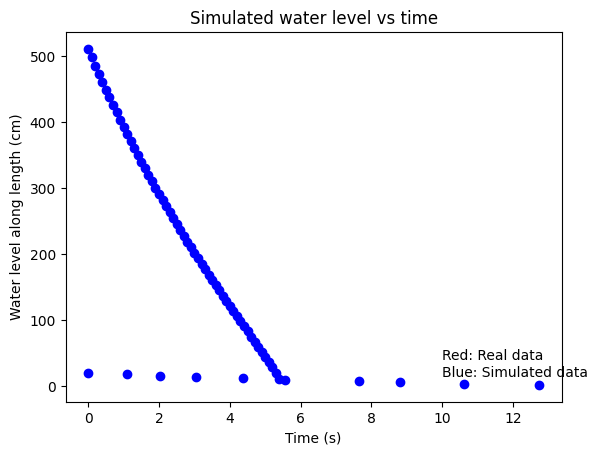

In [52]:
#calculate real water level
water_volume = 3.141 * (tube_inner_diameter / 2)**2 * tube_length * 0.75 #m^3 - 75% full

estimated_empty_time = get_time_to_empty(tube_length, orifice_diameter, gravity_gradient, end_gravity, water_volume, tube_inner_diameter)

#Real data
water_level = [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

timestamps = [
    0,
    1.1,
    2.03333333333334,
    3.03333333333334,
    4.36666666666667,
    5.56666666666667,
    7.63333333333337,
    8.79999999999997,
    10.6,
    12.7333333333334
]

plt.plot(timestamps, water_level, 'bo', label='Real data')
plt.title('Water level vs time')
plt.xlabel('Time (s)')
plt.ylabel('Water level (cm)')
plt.text(10, 15, 'Red: Real data\nBlue: Simulated data')

plt.title('Simulated water level vs time')
plt.xlabel('Time (s)')
plt.ylabel('Water level along length (cm)')

Text(0, 0.5, 'Position (revolutions)')

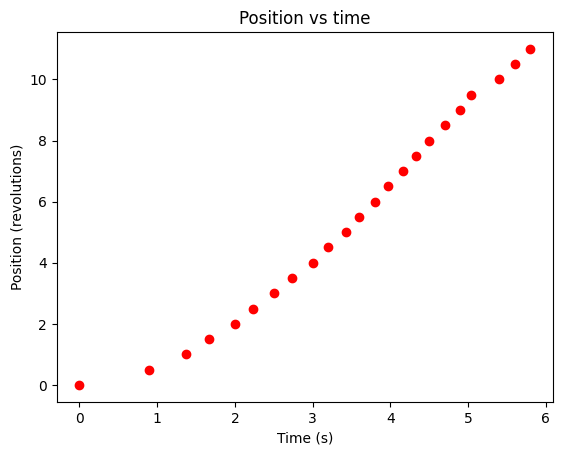

In [53]:
#Plot angular velcoity vs time
time = [
    0, 0.9, 1.36666666666667, 1.66666666666667, 2, 2.23333333333333, 2.5, 
    2.73333333333333, 3, 3.2, 3.43333333333333, 3.6, 3.8, 3.96666666666667, 
    4.16666666666667, 4.33333333333333, 4.5, 4.7, 4.9, 5.03333333333333, 
    5.4, 5.6, 5.8
]

position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]

plt.plot(time, position, 'ro')
plt.title('Position vs time')
plt.xlabel('Time (s)')
plt.ylabel('Position (revolutions)')

#convert



0.392
12.529964086141668
68.2000000000004


Text(0, 0.5, 'Water level (m)')

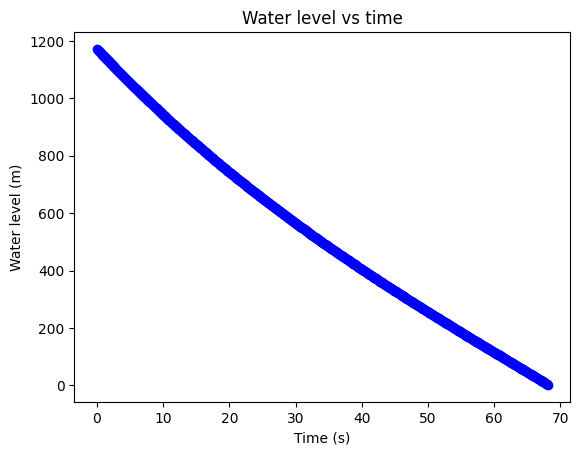

In [54]:
#Solution

#Problem variables
cylinder_length = 50 #m
cylinder_diameter = 3 #m
tank_length = 10 #m
orifice_diameter = 0.5 #m

gravity_gradient = 0.392 #9.81 / (cylinder_length/2) #m/s^2 per m
print(gravity_gradient)

water_volume = get_volume(tank_length, cylinder_diameter)

water_density = 1000 #kg/m^3
air_density = 1.2 #kg/m^3

discharge_time = get_time_to_empty(tank_length, orifice_diameter, gravity_gradient, 9.81, water_volume, cylinder_diameter)

start_velocity = get_discharge_velocity(tank_length, gravity_gradient, 9.81)
print(start_velocity)

print(discharge_time)

plt.title('Water level vs time')
plt.xlabel('Time (s)')
plt.ylabel('Water level (m)')
